In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [3]:
# data reading
games_df = pd.read_csv('games.csv')
game_deets_df = pd.read_csv('games_details.csv', low_memory=False)
players_df = pd.read_csv('players.csv')
ranking_df = pd.read_csv('ranking.csv')
teams_df = pd.read_csv('teams.csv')
games_df['GAME_DATE_EST']= pd.to_datetime(games_df['GAME_DATE_EST'])
pd.set_option('display.max_columns',21)

def get_mean(group, column):
    return group[column].mean()
def get_2mean(df,first,second):
    return (df[first]/df[second]).mean()
def get_2median(df,first,second):
    return (df[first]/df[second]).median()

print(f'Game details has {game_deets_df.shape[0]} rows and {game_deets_df.shape[1]} columns')
print(f'Team games has {games_df.shape[0]} rows and {games_df.shape[1]} columns')
print(f'Player informations has {players_df.shape[0]} rows and {players_df.shape[1]} columns')
print(f'Team ranking has {ranking_df.shape[0]} rows and {ranking_df.shape[1]} columns')
print(f'Team information has {teams_df.shape[0]} rows and {teams_df.shape[1]} columns')

print((games_df['FG3_PCT_home']/games_df['FG3_PCT_away']).mean)


Game details has 668628 rows and 29 columns
Team games has 26651 rows and 21 columns
Player informations has 7228 rows and 4 columns
Team ranking has 210342 rows and 13 columns
Team information has 30 rows and 14 columns
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        1.190031
1        1.372372
2        0.722864
3        1.137931
4        1.294521
           ...   
26646    1.122667
26647    1.426966
26648    1.000000
26649    0.864935
26650    0.760274
Length: 26651, dtype: float64>


In [4]:
wl_group = games_df.groupby(['HOME_TEAM_WINS'])

win_filt = wl_group.get_group(1)   #勝場資料
lose_filt = wl_group.get_group(0)  #敗場資料

reb_grp = games_df.groupby(['REB_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)
losereb_grp = games_df.groupby(['REB_away','HOME_TEAM_WINS'])
losereb_table = losereb_grp.size().unstack(fill_value=0)
ast_grp = games_df.groupby(['AST_home','HOME_TEAM_WINS'])
mean_w_reb = get_mean(win_filt,'REB_home')
ast_table= ast_grp.size().unstack(fill_value=0)
lose_ast_grp = games_df.groupby(['AST_away','HOME_TEAM_WINS'])
lose_ast_table = lose_ast_grp.size().unstack(fill_value=0)
fgpct_grp = games_df.groupby(['FG_PCT_home','HOME_TEAM_WINS'])
fgpct_table = fgpct_grp.size().unstack(fill_value=0)
fgpct_grp_lose = games_df.groupby(['FG_PCT_away','HOME_TEAM_WINS'])
fgpct_away_table = fgpct_grp_lose.size().unstack(fill_value=0)
fg3pct_grp= games_df.groupby(['FG3_PCT_home','HOME_TEAM_WINS'])
fg3pct_table = fg3pct_grp.size().unstack(fill_value=0)
fg3pct_grp_lose = games_df.groupby(['FG3_PCT_away','HOME_TEAM_WINS'])
fg3pct_away_table = fg3pct_grp_lose.size().unstack(fill_value=0)
ast_reb_grp = games_df.groupby(['AST_home','REB_home','HOME_TEAM_WINS'])
ast_reb_table = ast_reb_grp.size().unstack(fill_value=0)
teams_grp = games_df.groupby(['HOME_TEAM_ID','HOME_TEAM_WINS'])
most_win_table = teams_grp['HOME_TEAM_WINS'].size().unstack(fill_value=0)
teams_df.sort_values(by='TEAM_ID',ascending = True,inplace = True)
most_win_table.sort_values(by='HOME_TEAM_ID',ascending = True,inplace = True)
most_win_table['NAME'] = teams_df['NICKNAME'].values
most_win_table['ARENA_CAP'] = teams_df['ARENACAPACITY'].values
most_win_table.sort_values(by='ARENA_CAP',ascending = False,inplace = True)

In [5]:
pct_home_win = games_df['HOME_TEAM_WINS'].value_counts()/len(games_df) * 100
print(f'Teams are likely to win {pct_home_win[1]:.2f}% during home games, and lose {pct_home_win[0]:.2f}% during home games')

Teams are likely to win 58.70% during home games, and lose 41.30% during home games


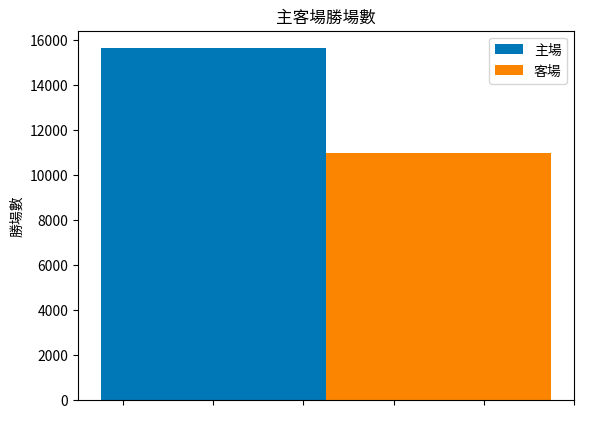

In [6]:


x = win_filt['HOME_TEAM_WINS'].value_counts()
y = lose_filt['HOME_TEAM_WINS'].value_counts()

ti = [0.5]
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = '主場')
plt.bar(hor + 0.75,y,width = 0.25,color = '#fb8500',label = '客場')

plt.ylabel('勝場數')
plt.xticks(color = 'w')
plt.title('主客場勝場數')
plt.legend()

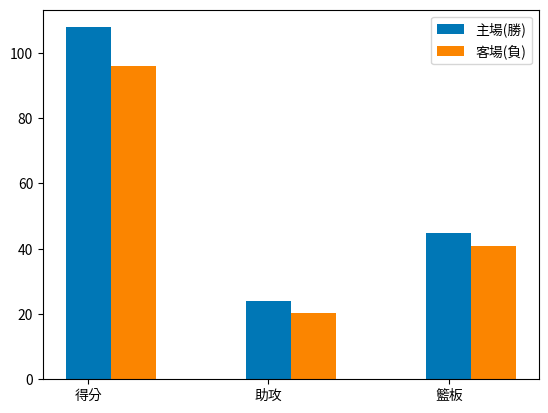

In [7]:
x = [get_mean(win_filt,'PTS_home'),get_mean(win_filt,'AST_home'),
     get_mean(win_filt,'REB_home')]
y = [get_mean(win_filt,'PTS_away'),get_mean(win_filt,'AST_away'),
     get_mean(win_filt,'REB_away')]

ti = ['得分','助攻','籃板']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = '主場(勝)')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = '客場(負)')
plt.legend()

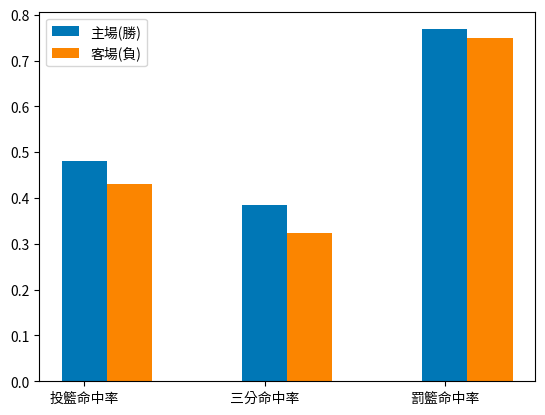

In [8]:
# plotting using the bar graph the difference between the fg pct and 3pt fg pct of home and away games
x = [get_mean(win_filt,'FG_PCT_home'),get_mean(win_filt,'FG3_PCT_home'),
    get_mean(win_filt,'FT_PCT_home')]
y = [get_mean(win_filt,'FG_PCT_away'),get_mean(win_filt,'FG3_PCT_away'),
    get_mean(win_filt,'FT_PCT_away')]
ti = ['投籃命中率','三分命中率','罰籃命中率']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = '主場(勝)')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = '客場(負)')
plt.legend()

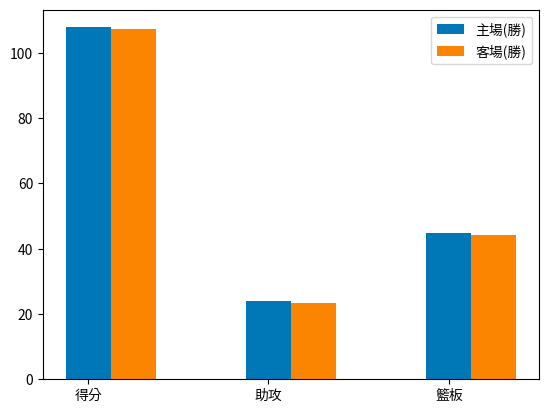

In [9]:
x = [get_mean(win_filt,'PTS_home'),get_mean(win_filt,'AST_home'),
    get_mean(win_filt,'REB_home')]
y = [get_mean(lose_filt,'PTS_away'),get_mean(lose_filt,'AST_away'),
    get_mean(lose_filt,'REB_away')]

ti = ['得分','助攻','籃板']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = '主場(勝)')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = '客場(勝)')
plt.legend()

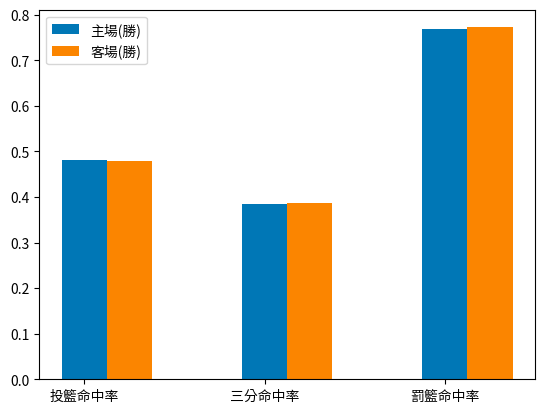

In [74]:
x = [get_mean(win_filt,'FG_PCT_home'),get_mean(win_filt,'FG3_PCT_home'),
    get_mean(win_filt,'FT_PCT_home')]
y = [get_mean(lose_filt,'FG_PCT_away'),get_mean(lose_filt,'FG3_PCT_away'),
    get_mean(lose_filt,'FT_PCT_away')]

ti = ['投籃命中率','三分命中率','罰籃命中率']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = '主場(勝)')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = '客場(勝)')
plt.legend()

inf


<function matplotlib.pyplot.show(close=None, block=None)>

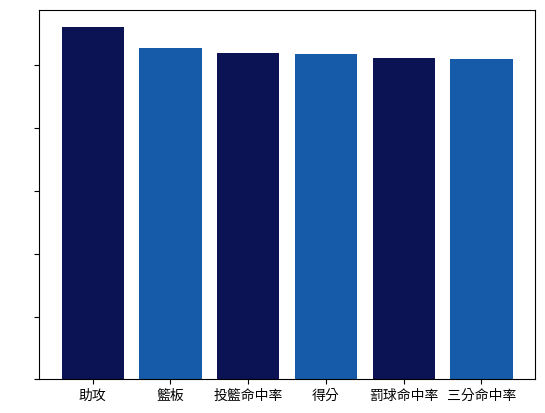

In [11]:
fg_3pct = get_2median(games_df,'FG3_PCT_home','FG3_PCT_away')
fg_pct = get_2mean(games_df,'FG_PCT_home','FG_PCT_away')
pts_allowed = get_2mean(games_df,'PTS_home','PTS_away')
reb = get_2mean(games_df,'REB_home','REB_away')
ast = get_2mean(games_df,'AST_home','AST_away')
free_throw = get_2mean(games_df,'FT_PCT_home','FT_PCT_away')


fg_3pct1 = get_2mean(games_df,'FG3_PCT_home','FG3_PCT_away')
print(fg_3pct1)

x = [ast,reb,fg_pct,pts_allowed,free_throw,fg_3pct]
y = ['助攻','籃板','投籃命中率','得分','罰球命中率','三分命中率']


plt.yticks(color = 'w')
plt.bar(y,x,color = ['#0b1354','#165baa'])
plt.show

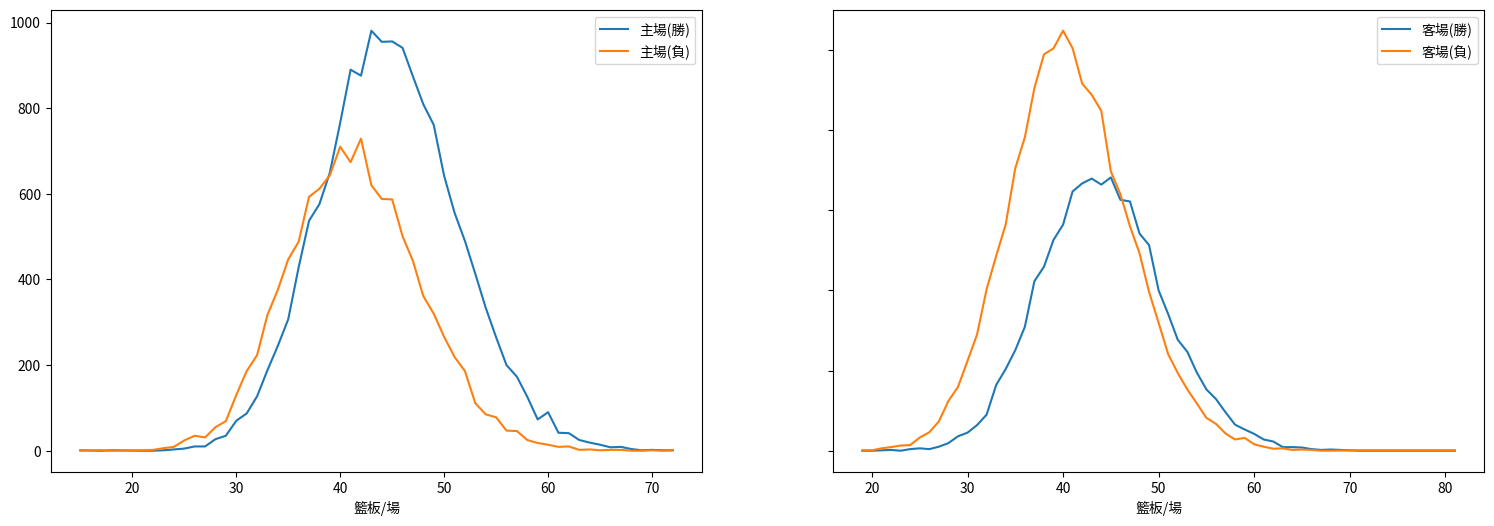

In [35]:
plt.subplot(1,2,1)

reb_grp = games_df.groupby(['REB_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)



plt.plot(reb_table[1],label = '主場(勝)')
plt.plot(reb_table[0],label = '主場(負)')

plt.legend()
plt.xlabel('籃板/場')
plt.subplot(1,2,2)

reb_grp = games_df.groupby(['REB_away','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)

plt.plot(reb_table[0],label = '客場(勝)')
plt.plot(reb_table[1],label = '客場(負)')
plt.legend()

plt.yticks(c='w')
# plt.xlim([10,50])
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('籃板/場')
plt.legend()



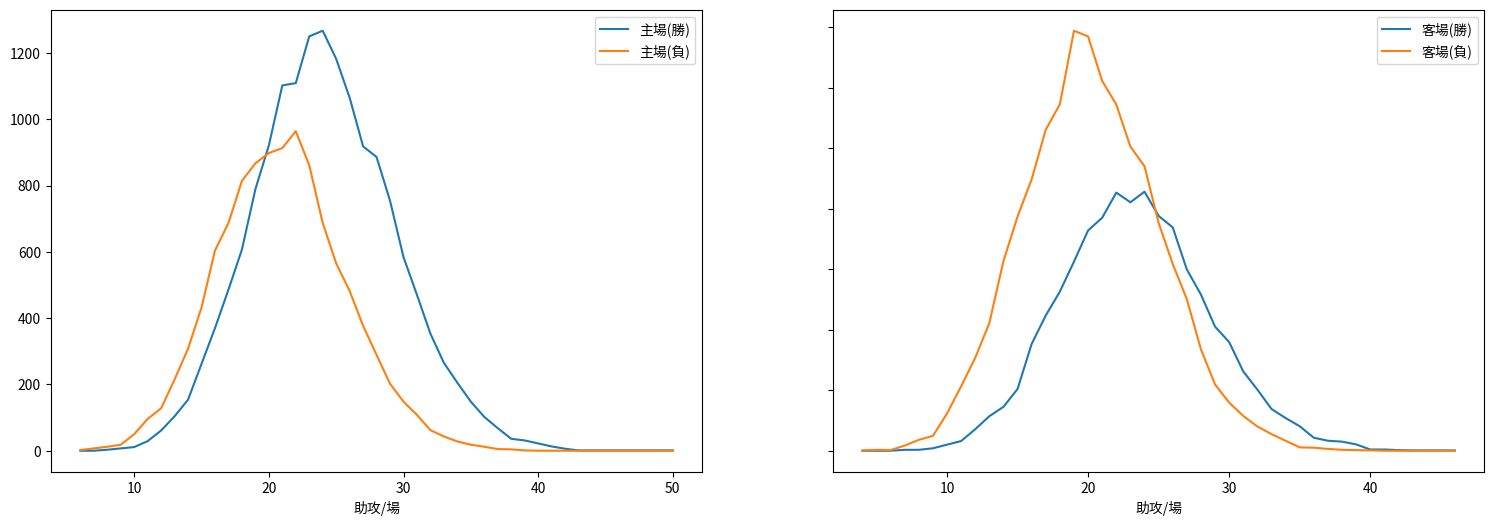

In [37]:
plt.subplot(1,2,1)

reb_grp = games_df.groupby(['AST_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)



plt.plot(reb_table[1],label = '主場(勝)')
plt.plot(reb_table[0],label = '主場(負)')


plt.xlabel('助攻/場')
plt.legend()



plt.subplot(1,2,2)

reb_grp = games_df.groupby(['AST_away','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)

plt.plot(reb_table[0],label = '客場(勝)')
plt.plot(reb_table[1],label = '客場(負)')

plt.legend()

plt.yticks(c='w')
# plt.xlim([10,75])
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('助攻/場')
plt.legend()

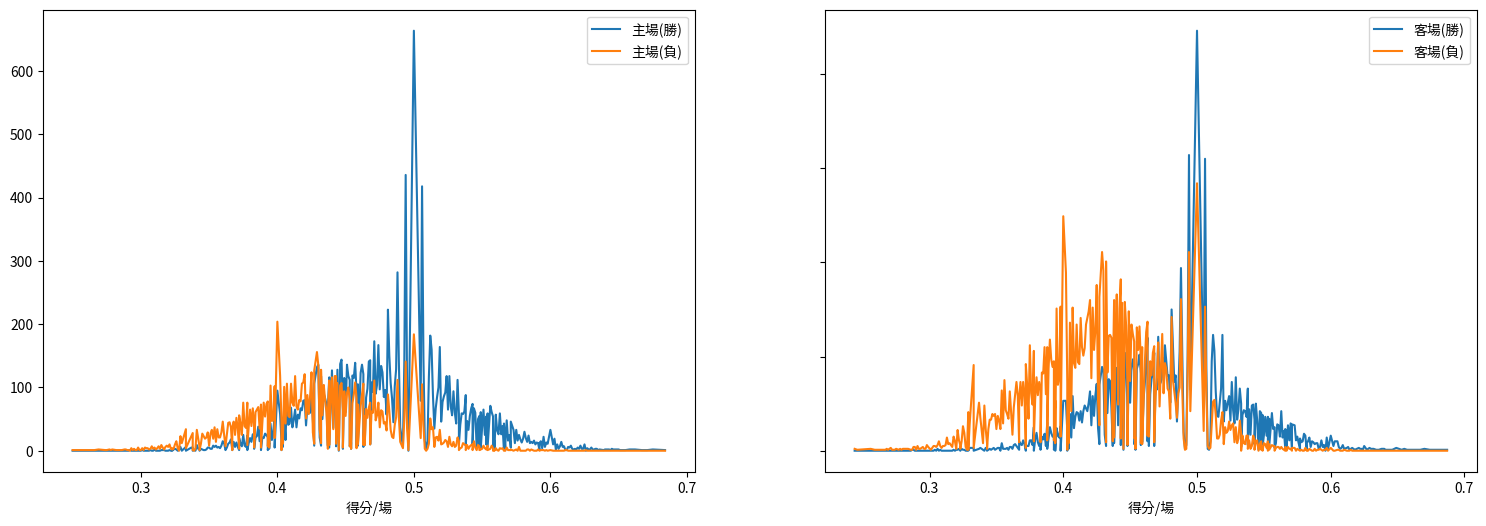

In [73]:
plt.subplot(1,2,1)

reb_grp = games_df.groupby(['FG_PCT_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)



plt.plot(reb_table[1],label = '主場(勝)')
plt.plot(reb_table[0],label = '主場(負)')



plt.xlabel('得分/場')
plt.legend()



plt.subplot(1,2,2)

reb_grp = games_df.groupby(['FG_PCT_away','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)

plt.plot(reb_table[0],label = '客場(勝)')
plt.plot(reb_table[1],label = '客場(負)')

plt.legend()

plt.yticks(c='w')

fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('得分/場')
plt.legend()

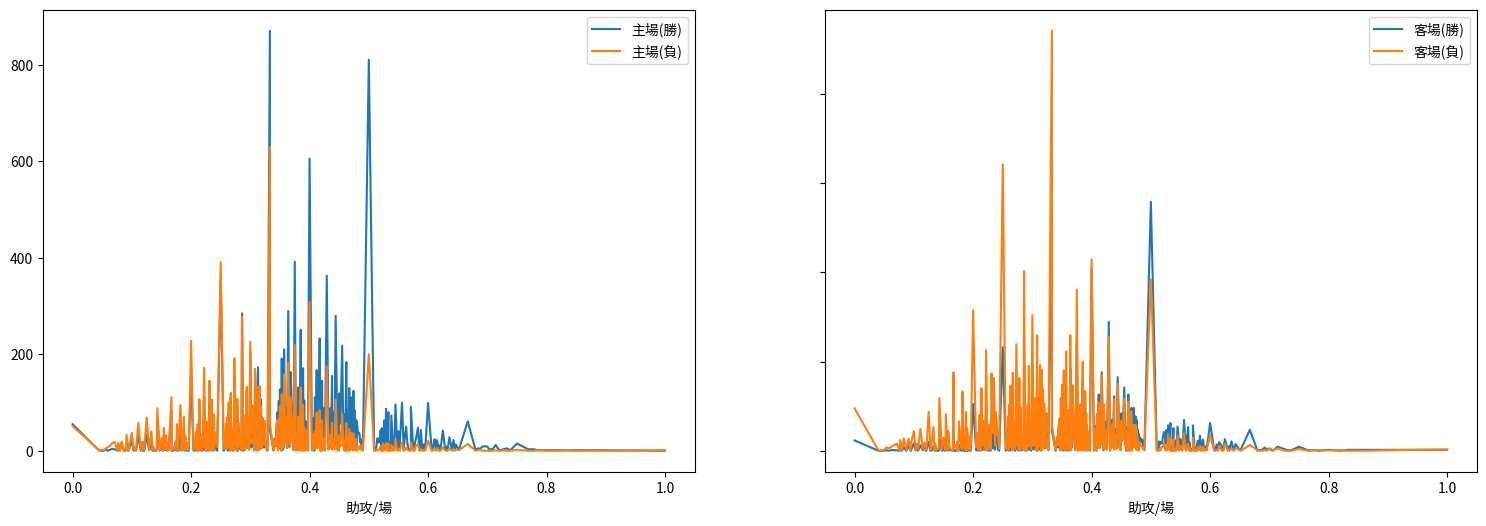

In [41]:
plt.subplot(1,2,1)

reb_grp = games_df.groupby(['FG3_PCT_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)



plt.plot(reb_table[1],label = '主場(勝)')
plt.plot(reb_table[0],label = '主場(負)')



plt.xlabel('三分得分/場')
plt.legend()



plt.subplot(1,2,2)

reb_grp = games_df.groupby(['FG3_PCT_away','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)

plt.plot(reb_table[0],label = '客場(勝)')
plt.plot(reb_table[1],label = '客場(負)')

plt.legend()

plt.yticks(c='w')

fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('三分得分/場')
plt.legend()

HOME_TEAM_ID
1610612741            Bulls
1610612765          Pistons
1610612764          Wizards
1610612739        Cavaliers
1610612762             Jazz
1610612757    Trail Blazers
1610612761          Raptors
1610612752           Knicks
1610612748             Heat
1610612744         Warriors
1610612750     Timberwolves
1610612742        Mavericks
1610612760          Thunder
1610612743          Nuggets
1610612746         Clippers
1610612747           Lakers
1610612766          Hornets
1610612737            Hawks
1610612759            Spurs
1610612738          Celtics
1610612754           Pacers
1610612763        Grizzlies
1610612745          Rockets
1610612758            Kings
1610612749            Bucks
1610612753            Magic
1610612740         Pelicans
1610612751             Nets
1610612755            76ers
1610612756             Suns
Name: NAME, dtype: object


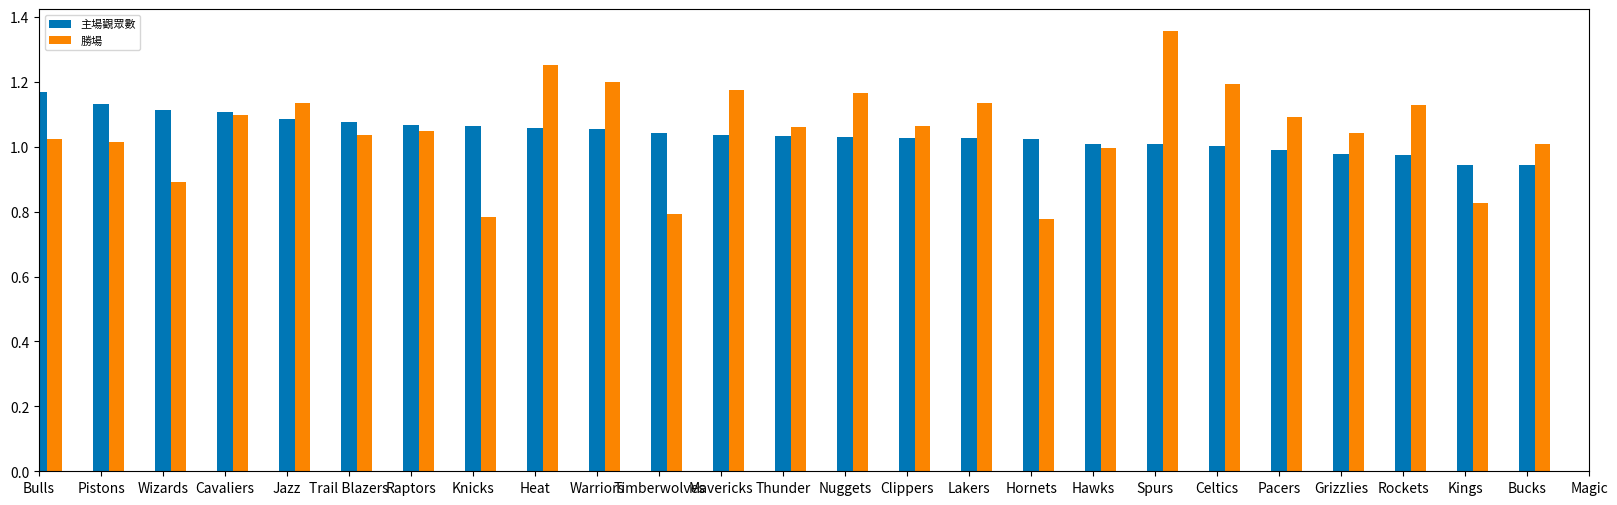

In [72]:

teams_grp = games_df.groupby(['HOME_TEAM_ID','HOME_TEAM_WINS'])
most_win_table = teams_grp['HOME_TEAM_WINS'].size().unstack(fill_value=0)
teams_df.sort_values(by='TEAM_ID',ascending = True,inplace = True)
most_win_table.sort_values(by='HOME_TEAM_ID',ascending = True,inplace = True)
most_win_table['NAME'] = teams_df['NICKNAME'].values
most_win_table['ARENA_CAP'] = teams_df['ARENACAPACITY'].values
most_win_table.sort_values(by='ARENA_CAP',ascending = False,inplace = True)
most_win_table['MEAN_ARENA_CAP']=[x/18553.31 for x in most_win_table['ARENA_CAP']]#avg capacity
most_win_table['MEAN_WINS']=[x/505.17 for x in most_win_table[1]]#avg win
ti = [x for x in range(30)]
hor = np.arange(len(ti))

x = [x for x in most_win_table['MEAN_ARENA_CAP']]

y = [x for x in most_win_table['MEAN_WINS']]

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = '主場觀眾數')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = '勝場')

bars = most_win_table['NAME']

print(most_win_table['NAME'])

plt.xticks(hor, bars)


plt.xlim(0,25)

fig = plt.gcf()
fig.set_size_inches(20,6)
plt.legend(loc = 'upper left',fontsize = 8)